<a href="https://colab.research.google.com/github/daniel-usp/MBA-BIA-USP/blob/main/Estat%C3%ADstica%20para%20Ci%C3%AAncia%20de%20Dados/Estat%C3%ADstica_Ci%C3%AAncia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo de Caso -  Atributos que Influenciam o Valor dos Imóveis em São Paulo 🏙️

O mercado imobiliário de São Paulo é vasto e diversificado, abrangendo uma variedade de bairros, perfis de imóveis e públicos. Um investidor bem-informado busca compreender quais variáveis são determinantes para o valor total dos imóveis, de forma a realizar escolhas mais assertivas e maximizar o retorno sobre o investimento.

Imagine que você é um investidor interessado em alocar recursos em imóveis de São Paulo. Você deseja saber quais atributos, como área útil, número de quartos e proximidade de estações de metrô, influenciam mais diretamente o valor total dos imóveis. Para isso, você dispõe de um conjunto de dados coletados na plataforma Quinto Andar, com informações abrangentes sobre o mercado.

Nos exercícios a seguir, você será guiado através de uma série de análises para explorar os dados e testar hipóteses. Vamos iniciar essa jornada exploratória e estatística!

## Objetivo do Estudo 📊

Este estudo tem como objetivo principal realizar uma análise estatística descritiva e inferencial para investigar os fatores que afetam o valor dos imóveis em São Paulo. A partir desta análise, você poderá identificar variáveis que influenciam diretamente o valor dos imóveis e construir hipóteses robustas para análises futuras.

---

## Exercícios 📘

### 1. Estatística Descritiva: Primeiras Impressões 📈

#### Conceito de Estatística Descritiva

A estatística descritiva refere-se a métodos e procedimentos para sumarizar e organizar dados de forma a proporcionar uma visão geral e compreensível das características principais do conjunto de dados. Os parâmetros descritivos incluem:

- **Média**: Representa o valor médio de uma variável e é amplamente utilizada para identificar uma medida central, indicando a tendência geral dos valores.
- **Mediana**: Um parâmetro robusto contra valores extremos (ou outliers), que oferece uma alternativa à média para situações em que os dados apresentam grande variabilidade.
- **Desvio padrão**: Mede o grau de dispersão em torno da média, auxiliando a avaliação da homogeneidade dos dados.

💡 *Exercício*: Calcule essas estatísticas para as variáveis `valor_total`, `preco_m2`, `area_util`, `quartos`, `vagas` e `condominio`.




In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Carregamento dos dados
dados_imoveis = pd.read_excel('https://github.com/daniel-usp/MBA-BIA-USP/raw/main/Fundamentos%20de%20Python/dados_imoveis_SP_Aula.xlsx')

# Exibição das primeiras linhas para entender a estrutura dos dados
dados_imoveis.head()

,valor_total,preco_m2,area_util,quartos,vagas,condominio,suites,banheiros,piscina,academia,quadra,bairro,media_idh,media_gini,renda_percapita,estacao_prox,linha_prox,dist_metro
0,189900,5934.38,32,2,1,180,0,1,0,1,0,JOSE BONIFACIO,0.697182,0.410909,559.668182,SÃO MATEUS,PRATA,6822.823684
1,221110,5142.09,43,2,1,250,0,1,0,0,1,JOSE BONIFACIO,0.697182,0.410909,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4682.709841
2,219990,5116.05,43,1,1,300,0,1,1,0,0,JOSE BONIFACIO,0.697182,0.410909,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4579.311123
3,219990,5116.05,43,2,1,300,0,1,1,0,0,JOSE BONIFACIO,0.697182,0.410909,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4579.311123
4,220000,5365.85,41,2,1,300,0,1,1,1,1,JOSE BONIFACIO,0.697182,0.410909,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,3313.918703


Estatística do teste: 0.6431280976542064
Valor-p: 4.323968501730174e-56
Os dados de 'valor_total' NÃO seguem uma distribuição normal.


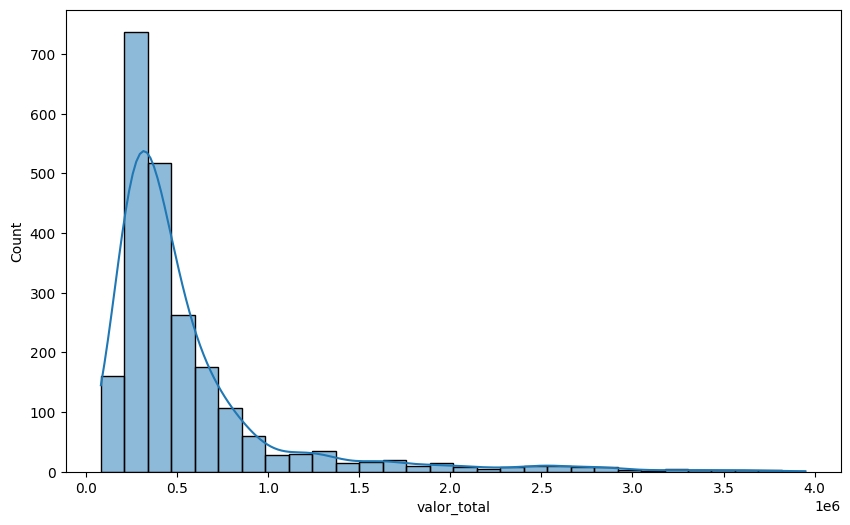

In [11]:
#Criar um histograma do valor_total
plt.figure(figsize=(10, 6))
sns.histplot(dados_imoveis['valor_total'], bins=30, kde=True)

from scipy.stats import shapiro

# Teste de Shapiro-Wilk
estatistica, p_value = shapiro(dados_imoveis['valor_total'])

# Resultados do teste
print("Estatística do teste:", estatistica)
print("Valor-p:", p_value)

# Avaliação de normalidade
if p_value > 0.05:
    print("Os dados de 'valor_total' seguem uma distribuição normal.")
else:
    print("Os dados de 'valor_total' NÃO seguem uma distribuição normal.")


In [2]:
# 1. Estatística Descritiva: Primeiras Impressões
# Cálculo de média, mediana e desvio padrão das variáveis
estatisticas_descritivas = dados_imoveis[['valor_total', 'preco_m2', 'area_util', 'quartos', 'vagas', 'condominio']].describe().T
estatisticas_descritivas['mediana'] = dados_imoveis[['valor_total', 'preco_m2', 'area_util', 'quartos', 'vagas', 'condominio']].median()
estatisticas_descritivas[['mean', 'mediana', 'std']]



,mean,mediana,std
valor_total,554514.423196,390000.00,516054.859733
preco_m2,7245.002032,6578.95,2887.327976
area_util,71.065958,60.00,42.005088
quartos,2.281098,2.00,0.632211
vagas,1.236830,1.00,1.097605
condominio,606.028774,485.00,554.350458


### 2. Visualização das Distribuições 🖼️

A visualização de dados permite observar as distribuições e identificar padrões. Utilize gráficos adequados para as seguintes variáveis:

- **Histograma** para `valor_total`, `area_util` e `preco_m2` — ideal para examinar a frequência dos valores.
- **Gráfico de dispersão** entre `area_util` e `valor_total` — permite observar a relação entre área e valor.
- **Boxplot** de `valor_total` e `preco_m2` em função do número de `quartos` — possibilita comparar valores conforme o número de quartos.

🎨 *Pergunta*: Quais padrões emergem? O que eles sugerem em termos de comportamento das variáveis?



## Entendendo o BoxPlot

<img src='https://github.com/daniel-usp/MBA-BIA-USP/raw/main/Agente%20de%20IA/boxplot1.png' width=40%>

<img src='https://github.com/daniel-usp/MBA-BIA-USP/raw/main/Agente%20de%20IA/boxplot2.png' width=40%>



<Axes: xlabel='quartos', ylabel='valor_total'>

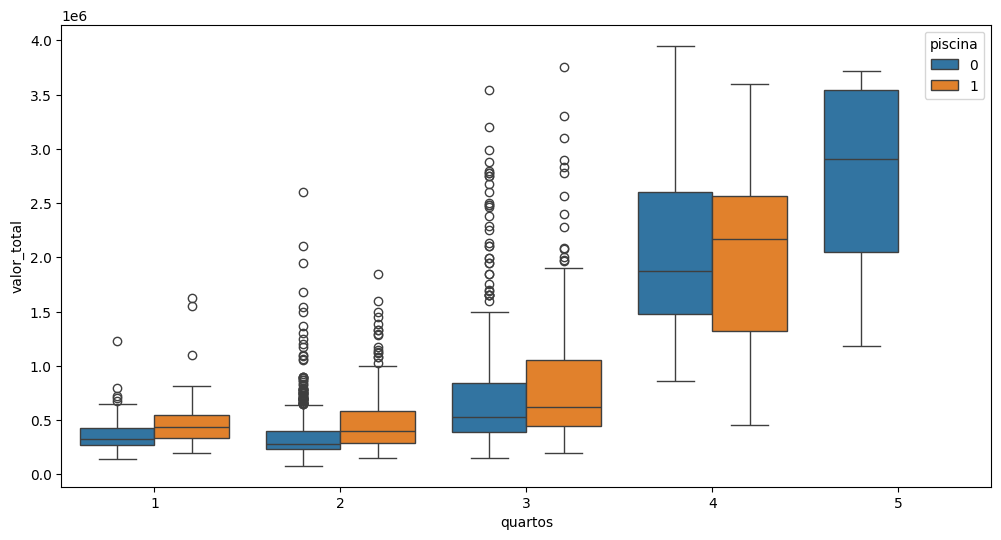

In [4]:
#Boxplot de valor_total e preco_m2 em função do número de quartos — possibilita comparar valores conforme o número de quartos
plt.figure(figsize=(12, 6))
sns.boxplot(x='quartos', y='valor_total', hue = 'piscina'  ,data=dados_imoveis)



In [8]:
#Faça um teste de hipótese (supondo normal) para verificar se a média do valor total dos imoveis com 4 quartos e com piscina é igual ao valor dos imoveis com 4 quartos sem piscina
from scipy.stats import ttest_ind

data = dados_imoveis

# Filtrar imóveis com 4 quartos
imoveis_4_quartos = data[data['quartos'] == 4]

# Separar os grupos com e sem piscina
com_piscina = imoveis_4_quartos[imoveis_4_quartos['piscina'] == 1]['valor_total']
sem_piscina = imoveis_4_quartos[imoveis_4_quartos['piscina'] == 0]['valor_total']

# Realizar o teste-t
t_stat, p_value = ttest_ind(com_piscina, sem_piscina, equal_var=False)

# Exibir os resultados
media_com_piscina = com_piscina.mean()
media_sem_piscina = sem_piscina.mean()
resultado = {
    "Média com piscina": media_com_piscina,
    "Média sem piscina": media_sem_piscina,
    "Estatística t": t_stat,
    "Valor p": p_value
}

resultado

# Gerar uma frase simples baseada no resultado do teste-t
if p_value > 0.05:
    conclusao = "As médias dos valores dos imóveis com 4 quartos são estatisticamente iguais."
else:
    conclusao = "As médias dos valores dos imóveis com 4 quartos são estatisticamente diferentes."

conclusao



'As médias dos valores dos imóveis com 4 quartos são estatisticamente iguais.'

In [7]:
# Filtrar imóveis com 4 quartos
imoveis_4_quartos = data[data['quartos'] == 4]
imoveis_4_quartos

,valor_total,preco_m2,area_util,quartos,vagas,condominio,suites,banheiros,piscina,academia,quadra,bairro,media_idh,media_gini,renda_percapita,estacao_prox,linha_prox,dist_metro
208,1549980,9872.48,157,4,2,680,3,5,0,0,0,LAPA,0.911000,0.512500,3361.127500,VILA MADALENA,VERDE,3939.757083
344,2600000,9523.81,273,4,3,2460,2,4,0,0,0,PARELHEIROS,0.705353,0.435882,597.907059,CAPÃO REDONDO,LILAS,16907.169119
347,1600000,9580.84,167,4,2,2193,1,3,0,0,0,PARELHEIROS,0.705353,0.435882,597.907059,CAPÃO REDONDO,LILAS,16907.169119
348,3600000,10055.87,358,4,4,4400,4,4,1,0,1,PARELHEIROS,0.705353,0.435882,597.907059,CAPÃO REDONDO,LILAS,10213.112144
367,600000,2843.60,211,4,3,2500,2,5,1,1,1,VILA SONIA,0.815000,0.465556,2000.853333,SÃO PAULO-MORUMBI,AMARELA,2881.489003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,2814000,13400.00,210,4,3,1500,3,6,0,0,0,VILA LEOPOLDINA,0.748200,0.448000,1458.268000,VILA MADALENA,VERDE,4411.043074
2123,1350000,8598.73,157,4,3,2500,2,5,0,1,0,VILA MARIANA,0.901714,0.512857,4411.871429,VILA MARIANA,AZUL,885.142874
2149,530000,3785.71,140,4,2,1260,1,3,1,0,0,VILA MATILDE,0.815429,0.438571,1225.875000,VILA MATILDE,VERMELHA,860.811370
2209,1890000,7875.00,240,4,4,3850,1,4,0,0,0,SANTA CECILIA,0.882500,0.493333,2572.448333,MARECHAL DEODORO,VERMELHA,479.060745


### 3. Comparação do Valor Médio por Bairro 🌆

Os bairros podem influenciar significativamente o preço dos imóveis devido a diferenças socioeconômicas e estruturais. Calcule a média e o desvio padrão do `valor_total` para cada bairro, e crie um gráfico de barras para visualizar as diferenças de preço.

*Exercício*: Selecione um bairro específico que você considera atrativo para investimentos e analise como o preço médio de seus imóveis se compara aos demais bairros.

*Pergunta*: Qual bairro apresenta, em média, imóveis com maior valor? Existe grande variabilidade de preços entre os bairros?



### Comparação de Médias e Testes de Hipótese para Diferentes Atributos dos Imóveis

A análise comparativa de médias é fundamental para compreender se variáveis categóricas, como proximidade ao metrô e localização em bairros diferentes, impactam significativamente o valor dos imóveis. Para isso, utilizamos testes de hipótese, que nos permitem avaliar se a diferença observada nas médias de dois grupos é estatisticamente significativa ou se pode ser atribuída ao acaso.

#### Teoria: Testes Paramétricos e Não-Paramétricos

Os testes de hipótese para comparação de médias são divididos em duas categorias principais:

1. **Testes Paramétricos**: Esses testes assumem que os dados seguem uma distribuição específica, geralmente a distribuição normal. Eles são mais poderosos em termos estatísticos quando essas suposições são atendidas. O **teste t de Student** para comparação de médias entre dois grupos é o exemplo clássico de teste paramétrico, sendo adequado para amostras que atendem às suposições de normalidade e homocedasticidade (ou seja, variâncias semelhantes entre os grupos).

2. **Testes Não-Paramétricos**: Quando as suposições de normalidade não são válidas, optamos por testes não-paramétricos, que são menos sensíveis a valores extremos e a distribuições atípicas. Um exemplo de teste não-paramétrico é o **teste de Mann-Whitney**, que compara as medianas de dois grupos e é indicado quando os dados não seguem a distribuição normal. Este teste utiliza a posição (ou ranking) dos valores para avaliar a diferença entre os grupos, sendo robusto para dados assimétricos ou com outliers.





### **Escolha da distribuição amostral adequada no teste paramétrico**
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

![Teste Bicaudal](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img005.png)

#### 4. Impacto da Proximidade ao Metrô no Valor Total dos Imóveis

Para avaliar se a proximidade a estações de metrô afeta o valor dos imóveis, faremos um teste de comparação de médias:

1. **Hipótese nula (\(Ho\))**: A média do valor dos imóveis próximos ao metrô (menos de 2 km) é igual à média dos imóveis mais distantes (mais de 2 km).
2. **Hipótese alternativa (\(H1\))**: A média do valor dos imóveis próximos ao metrô é diferente da média dos imóveis mais distantes.

Utilizaremos o **teste t de Student** para essa comparação, pois estamos assumindo que os dados seguem uma distribuição aproximadamente normal e que os grupos possuem variâncias semelhantes.

#### 5. Comparação de Preço por Metro Quadrado entre Dois Bairros

Para entender se o preço por metro quadrado difere significativamente entre dois bairros específicos, realizaremos um teste de hipótese não-paramétrico, dado que os preços por metro quadrado podem apresentar uma distribuição assimétrica.

1. **Hipótese nula (\(Ho\))**: A mediana dos preços por metro quadrado no Bairro 1 é igual à mediana dos preços no Bairro 2.
2. **Hipótese alternativa (\(H1\))**: A mediana dos preços por metro quadrado no Bairro 1 é diferente da mediana dos preços no Bairro 2.

Neste caso, utilizaremos o **teste de Mann-Whitney**, que permite comparar medianas de dois grupos independentemente de sua distribuição.

---

Essas análises de hipótese nos permitirão entender a influência de fatores geográficos e de localização no mercado imobiliário de São Paulo, possibilitando uma visão mais robusta para decisões de investimento.

### 6. Análise de Correlação 📊

Explore as relações entre as variáveis utilizando uma matriz de correlação. Isso permitirá identificar quais fatores possuem maior correlação com o `valor_total` dos imóveis. Crie um mapa de calor (heatmap) para visualizar a matriz.

- *Exercício*: Qual variável possui maior correlação com o `valor_total`? Tente identificar uma justificativa econômica para essa relação.

*Pergunta*: Quais variáveis apresentam maior correlação com o valor total do imóvel? Qual interpretação você faz disso?





### 7. Impacto do Índice de Desenvolvimento Humano (IDH) no Valor dos Imóveis 🧬

O IDH pode influenciar o valor dos imóveis, pois está relacionado à qualidade de vida dos moradores do bairro. Teste a hipótese de que o valor médio dos imóveis em bairros com IDH superior a 0.8 é maior.

1. Separe os dados em dois grupos: `alto_idh` (IDH > 0.8) e `baixo_idh` (IDH <= 0.8).
2. Realize um teste t para comparar os valores médios dos dois grupos.

💼 *Pergunta*: A hipótese foi confirmada? Qual é a relevância desse resultado para um investidor?

### 8. Análise de Influência de Amenidades no Valor dos Imóveis 🏊‍♀️🏋️‍♂️

Considere agora a influência de amenidades, como piscina, academia e quadra esportiva. Realize uma análise de variância (ANOVA) para verificar se a presença dessas amenidades impacta significativamente o `valor_total` dos imóveis.

1. Crie três grupos: imóveis com piscina, com academia e com quadra.
2. Calcule as médias e execute o teste ANOVA.

*Pergunta*: As amenidades influenciam o valor dos imóveis? Como esse conhecimento pode impactar suas decisões de investimento?



### 9. Estudo de Caso Final: Perfil do Imóvel Ideal para Investimento 💼

Baseando-se nas análises anteriores, proponha um perfil de imóvel ideal para investimento. Inclua os principais atributos que contribuem para o aumento do valor do imóvel, justificando suas escolhas com base nos resultados obtidos.

*Desafio*: Como você aplicaria esses resultados para realizar uma oferta em um imóvel específico de sua escolha?

---



## Conclusão 🎯

Ao completar este estudo, você terá desenvolvido uma compreensão sólida dos fatores que impactam o valor dos imóveis em São Paulo, com base em uma análise estatística detalhada. A partir dos resultados obtidos, você estará capacitado a tomar decisões de investimento mais embasadas e avaliar imóveis de maneira criteriosa.

Esse roteiro foi criado para fornecer uma compreensão acadêmica e aplicada sobre o valor dos imóveis. Boas análises e bons investimentos! 💰🏡